In [1]:
import pandas as pd
import numpy as np

experiments = [
    'standard',
    'critic-curriculum/p6',
    'critic-curriculum/p4',
    'critic-curriculum/p2',
    'critic-curriculum/p0',
    'systematic-curriculum'
]
seeds = [i+1 for i in range(5)]
tests = {}

base_dir = '../../evorobot-paper/data'

for exp in experiments:
    exp_tests = []
    for seed in seeds:
        t = np.load(f"{base_dir}/{exp}/tests/testS{seed}.npy")
        exp_tests += list(t)
    tests[exp] = exp_tests


Text(0.5, 0, '')

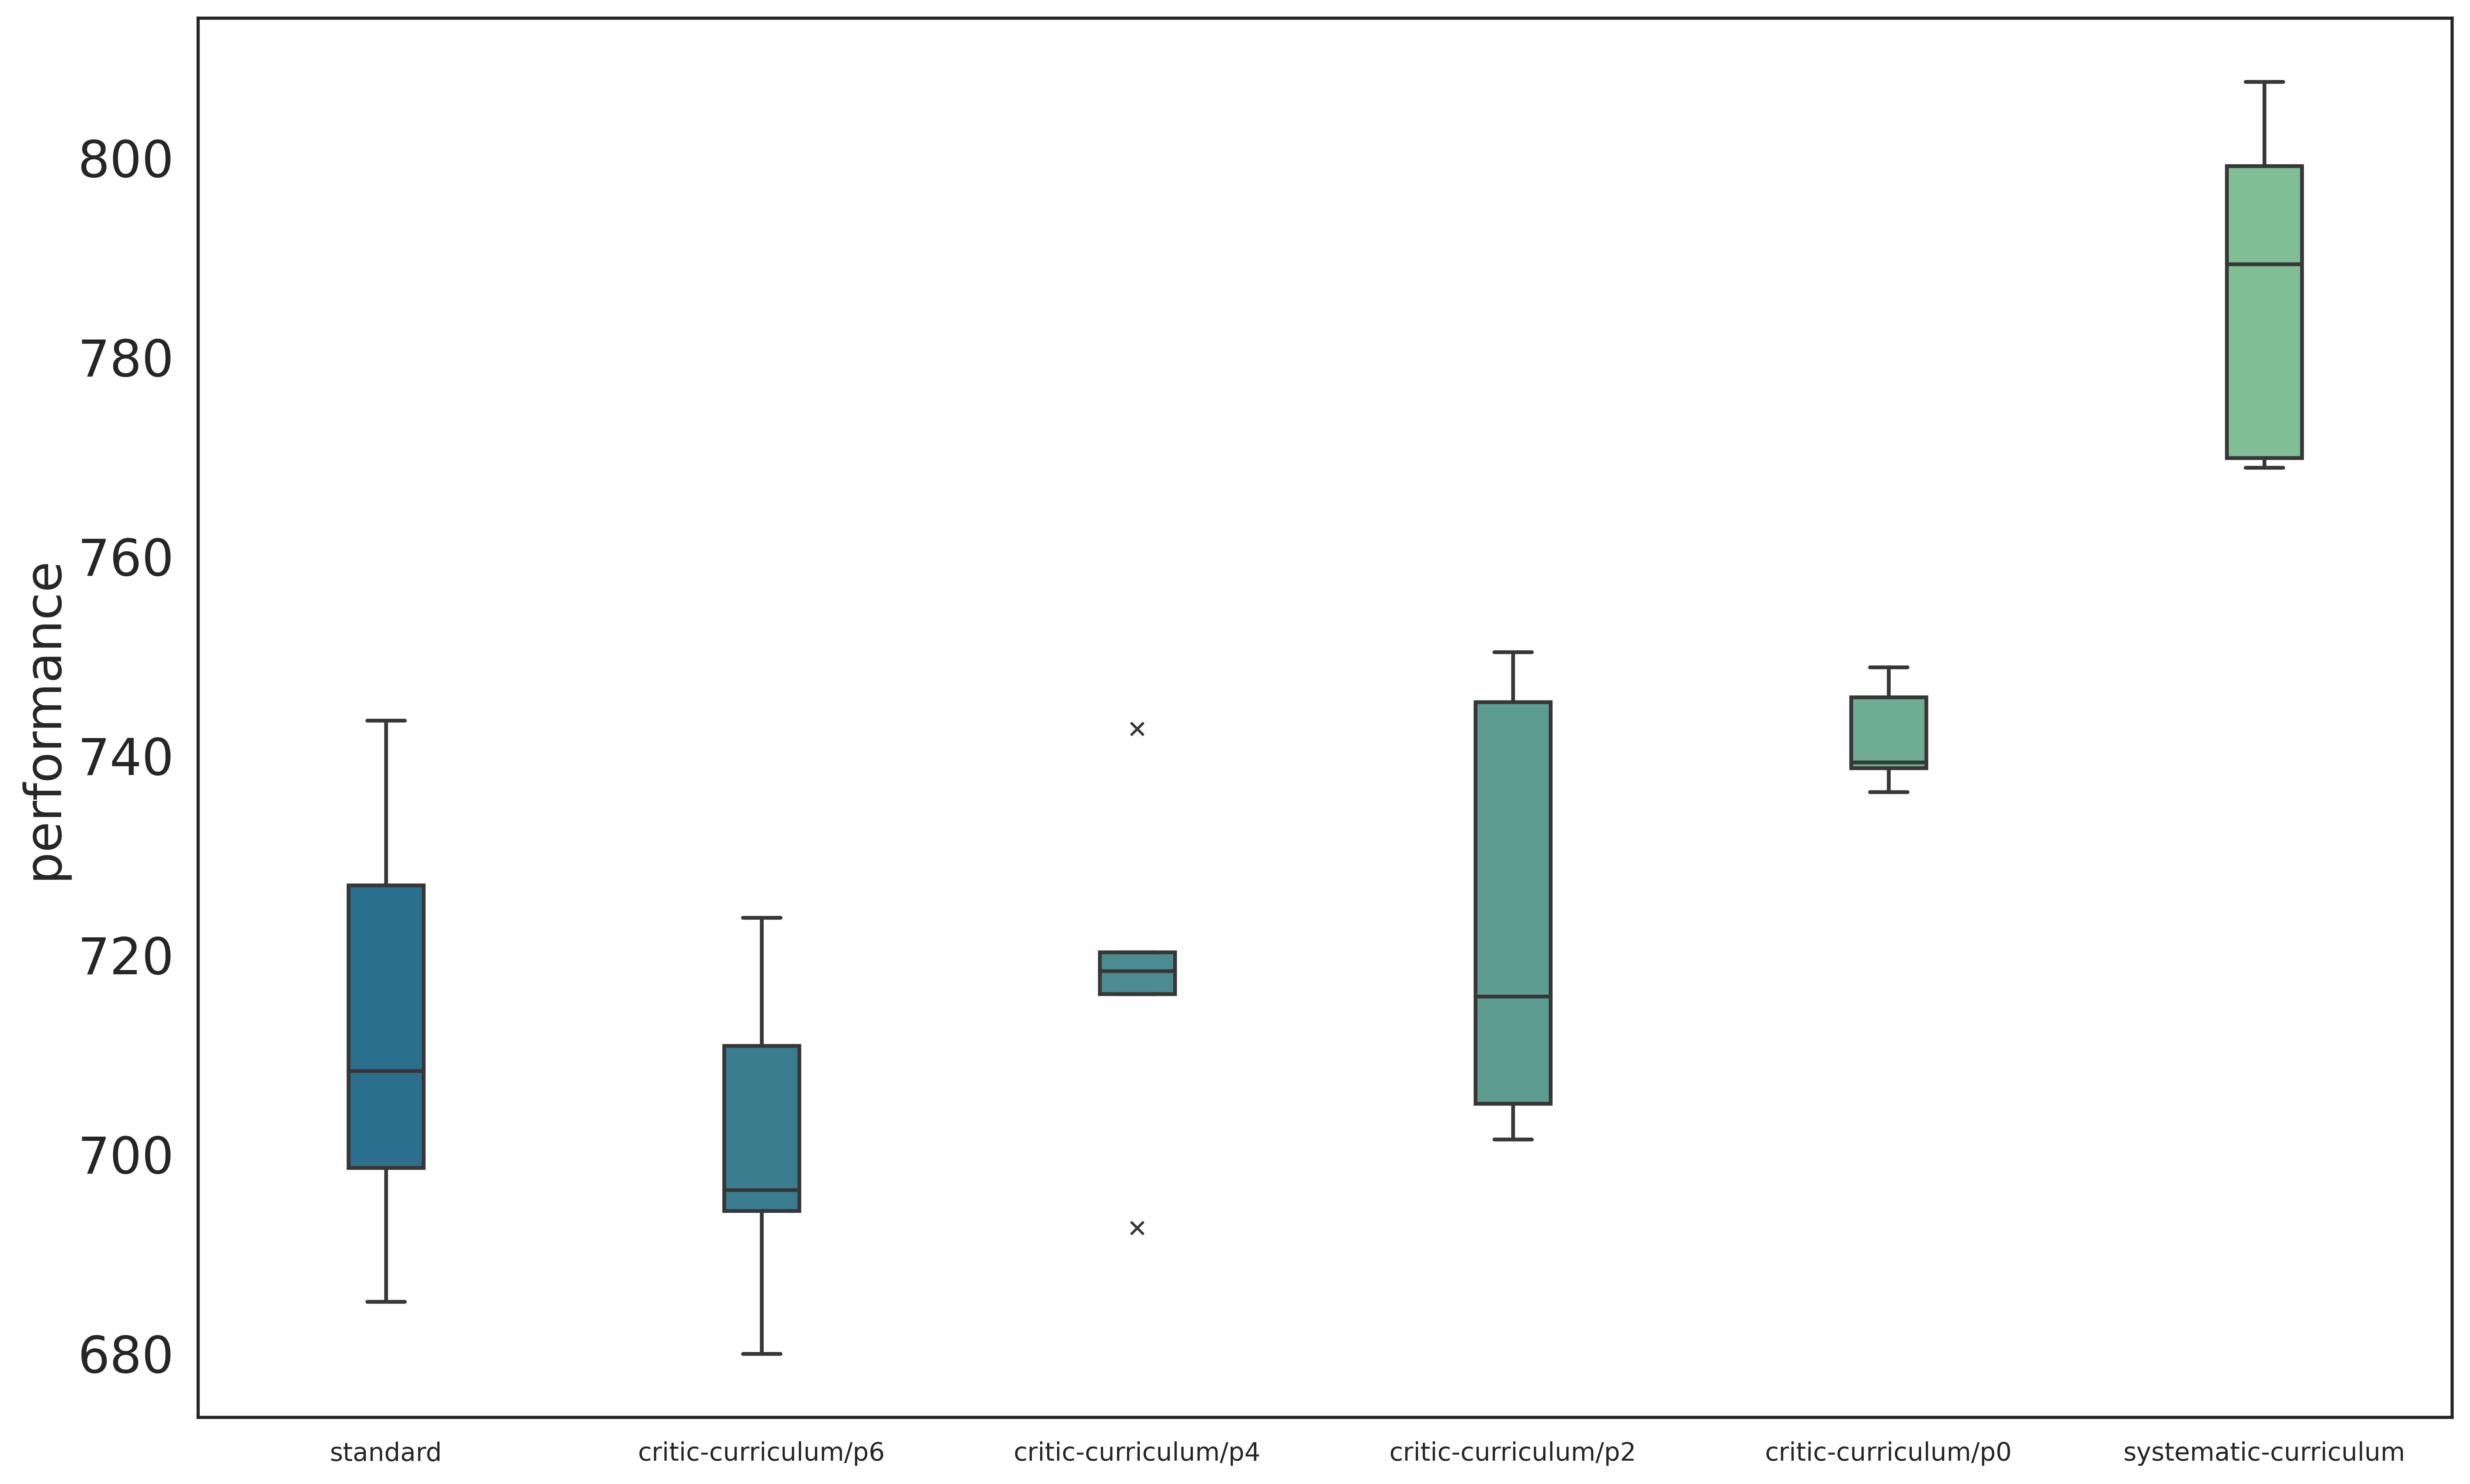

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(16,10)}, style='white')
palette = 'blend:#1a759f,#76c893'
plt.figure(dpi=600)

performance = list(tests.values())
exps = list(tests.keys())

sns.boxplot(performance, width=0.2, flierprops={"marker": "x"}, palette=palette)
plt.ylabel("performance", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=10, labels=exps, ticks=[i for i in range(len(experiments))])
plt.xlabel("")

In [3]:
usage = {}

for exp in experiments:
    exp_usage = []
    for seed in seeds:
        fp = f"{base_dir}/{exp}/logs/seedS{seed}.out"
        with open(fp, 'r') as f:
            sf = f.readlines()
            cpu_time = float(sf[-5].split(': ')[1])
            exp_usage.append(cpu_time)
    usage[exp] = exp_usage

Text(0.5, 0, '')

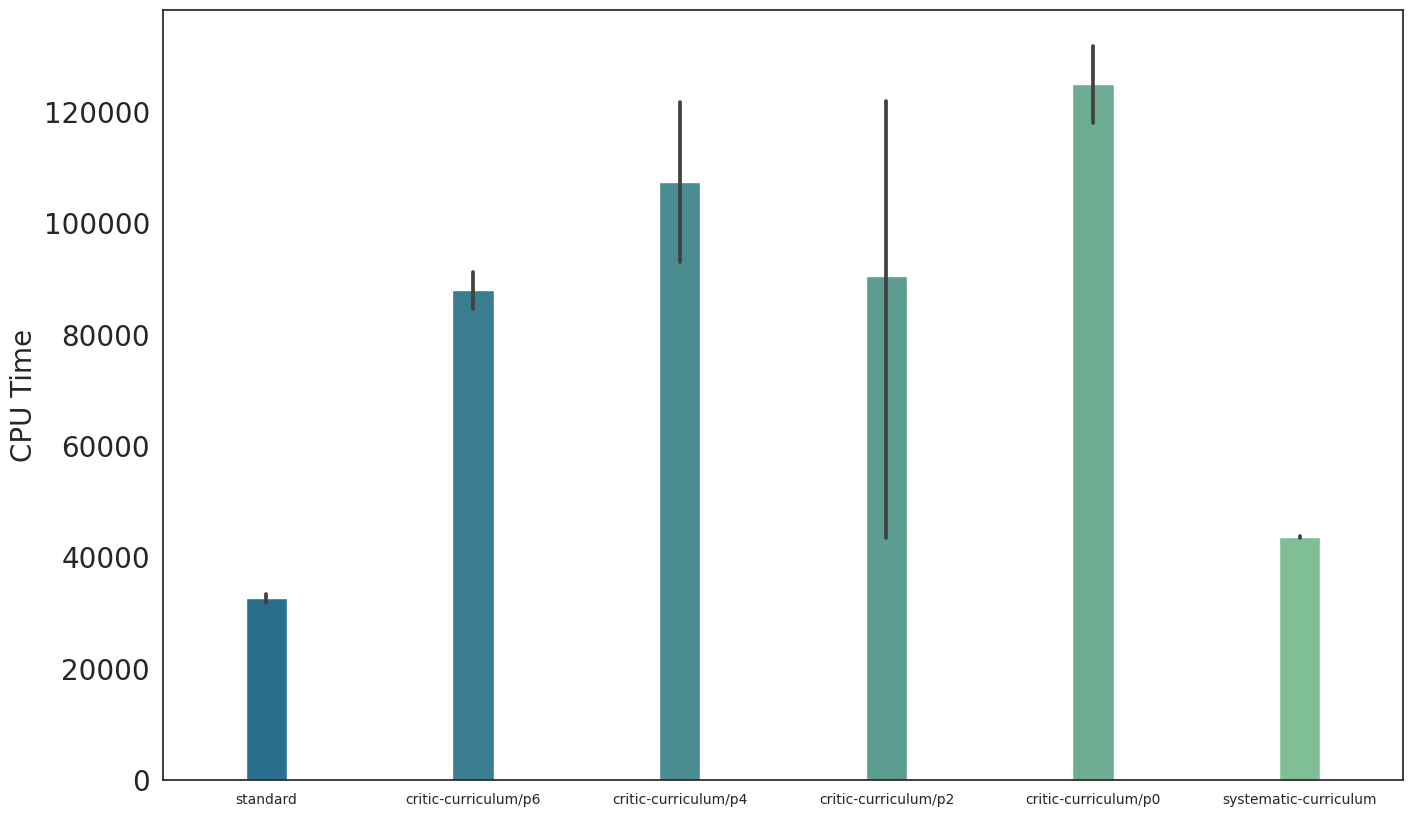

In [4]:
u = list(usage.values())

sns.barplot(u, width=0.2, palette=palette)
plt.ylabel("CPU Time", fontsize=20)
plt.yticks(fontsize=20)
plt.xticks(fontsize=10, labels=exps, ticks=[i for i in range(len(experiments))])
plt.xlabel("")